In [140]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import wave
from scipy.io.wavfile import write
from datetime import datetime

In [7]:
for files in os.listdir('/Users/jm186072/Documents/'):
    if files =='karan.wav':
        print(files)
        

karan.wav


In [ ]:
# Demonstrating Convolution using Audio Signal

In [21]:
spf = wave.open('/Users/jm186072/Documents/karan.wav','r')

In [22]:
signal = spf.readframes(-1)

In [23]:
type(signal)

str

In [24]:
signal = np.fromstring(signal,'Int16')

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.


In [31]:
signal.shape

(377916,)

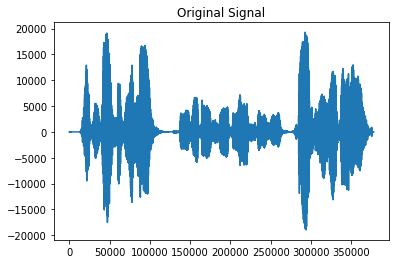

In [35]:
plt.plot(signal)
plt.title("Original Signal")
plt.show()

In [38]:
delta = np.array([1.,0.,0.])

In [39]:
delta

array([ 1.,  0.,  0.])

In [41]:
noecho = np.convolve(signal,delta)

In [44]:
noecho = noecho.astype(np.int16)

In [49]:
write('noecho.wav',88100,noecho)

In [52]:
filt = np.zeros(16000)
filt[0]= 1
filt[4000]=.8
filt[8000]=.6
filt[12000]=.3
filt[15999]=.1


In [53]:
echo = np.convolve(signal,filt)

In [54]:
echo = echo.astype(np.int16)

In [57]:
write('echo.wav',88000,echo)

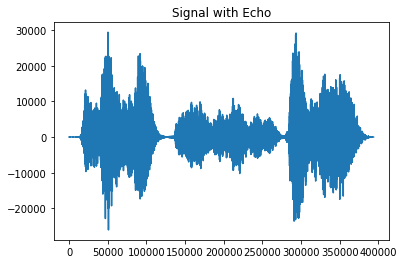

In [58]:
plt.plot(echo)
plt.title("Signal with Echo")
plt.show()

In [ ]:
# Demonstrating Convolution using Image
# First we load the original image
# Convert it into 2D array-meaning we get rid of the 3rd dimension, which is the colour
# Then we create a filter

In [87]:
from scipy.signal import convolve2d
import matplotlib.image as mpimg


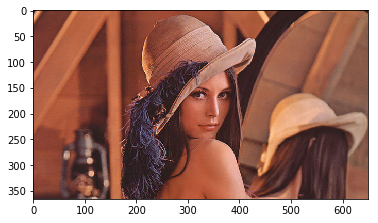

In [68]:
img = mpimg.imread('lena.jpg')
plt.imshow(img)
plt.show()

In [70]:
print(type(img))
print(img.shape)

<type 'numpy.ndarray'>
(366, 650, 3)


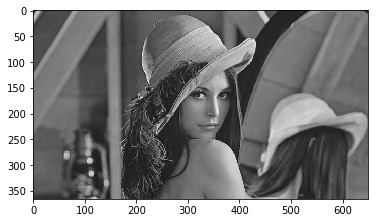

In [72]:
bw = img.mean(axis=2)
plt.imshow(bw,cmap='gray')
plt.show()

In [144]:
# creating the filter image.
W = np.zeros((20,20))

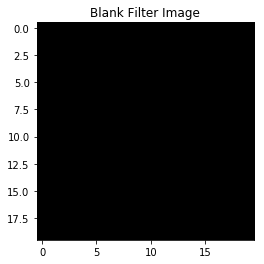

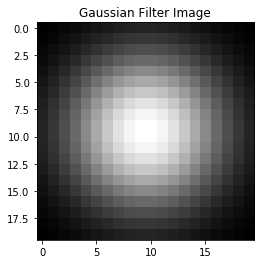

In [84]:
plt.imshow(W,cmap='gray')
plt.title("Blank Filter Image")
plt.show()

for i in range(20):
    for j in range(20):
        dist = (i-9.5)**2+(j-9.5)**2
        W[i,j] = np.exp(-dist/50)

plt.imshow(W,cmap='gray')
plt.title("Gaussian Filter Image")
plt.show()

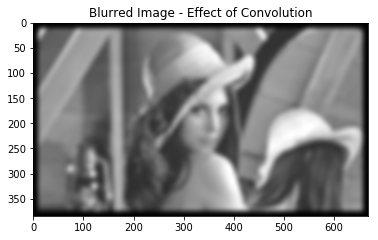

In [89]:
out = convolve2d(bw,W)
plt.imshow(out,cmap='gray')
plt.title("Blurred Image - Effect of Convolution")
plt.show()

In [91]:
print(out.shape)
print(img.shape)

(385, 669)
(366, 650, 3)


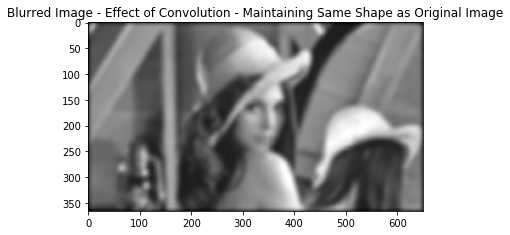

('Input Shape = ', (366, 650), 'Output Shape', (366, 650))


In [97]:
out = convolve2d(bw,W,mode='same')
plt.imshow(out,cmap='gray')
plt.title("Blurred Image - Effect of Convolution - Maintaining Same Shape as Original Image")
plt.show()
print("Input Shape = ",bw.shape,"Output Shape",out.shape)

(366, 650, 3)


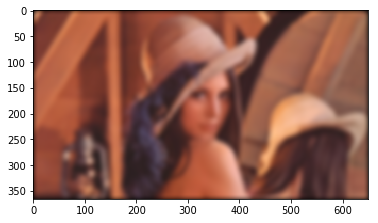

In [106]:
# What if we use convolution on the coloured image.We will have to do it manually as it is 3D
out3 = np.zeros(img.shape)
print(out3.shape)
for i in range(3):
    out3[:,:,i] = convolve2d(img[:,:,i], W, mode='same')
out3 /= out3.max() # can also do this if you didn't normalize the kernel
plt.imshow(out3)
plt.show() # does not look like anything


[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


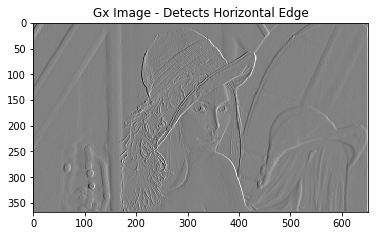

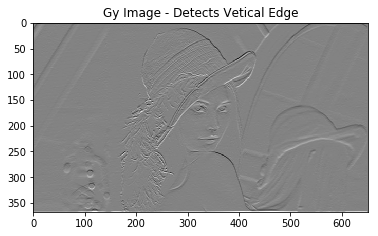

In [110]:
# Edge Detection - Using Sobel Operator
# This is again effect of onvolution
Hx = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1],
    ], dtype=np.float32)

Hy = Hx.T
print(Hy)
Gx = convolve2d(bw,Hx)
Gy = convolve2d(bw,Hy)

plt.imshow(Gx,cmap='gray')
plt.title("Gx Image - Detects Horizontal Edge")
plt.show()


plt.imshow(Gy,cmap='gray')
plt.title("Gy Image - Detects Vetical Edge")
plt.show()


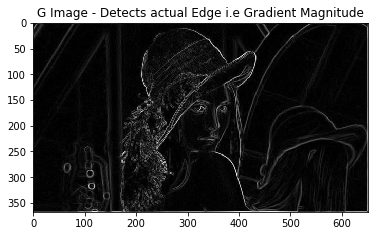

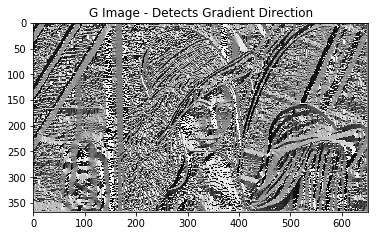

In [113]:
# G is a vector, for which you can calculate the magnitude and direction
# Magnitude First
G = np.sqrt(Gx*Gx + Gy*Gy)
plt.imshow(G,cmap='gray')
plt.title("G Image - Detects actual Edge i.e Gradient Magnitude")
plt.show()

# Direction next
theta = np.arctan2(Gy,Gx)
plt.imshow(theta,cmap='gray')
plt.title("G Image - Detects Gradient Direction")
plt.show()



In [ ]:
# So we saw how we can use filters to detect features or get features.
# Lets see how to write your own convolution


In [138]:


def my_conv(X,W):
    t0 = datetime.now()
    n1,n2 = X.shape
    m1,m2 = W.shape
    Y = np.zeros((n1+m1-1,n2+m2-1))
    for i in range(n1+m1-1):
        for ii in range(m1):
            for j in range(n2+m2-1):
                for jj in range(m2):
                    if i>=ii and j>= jj and i-ii<n1 and j-jj<n2:
                        Y[i:j] += W[ii,jj]*X[i-ii,j-jj]
    print("eleapsed time:",(datetime.now()-t0))        
    return Y
    

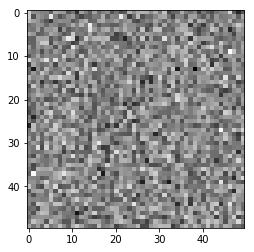

In [135]:
plt.imshow(X,cmap='gray')
plt.show()

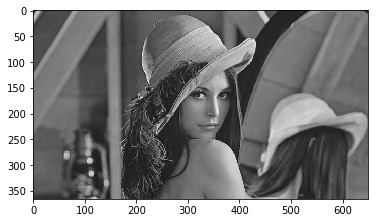

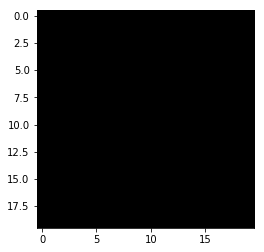

In [145]:
plt.imshow(bw,cmap='gray')
plt.show()

plt.imshow(W,cmap='gray')
plt.show()


('eleapsed time:', datetime.timedelta(0, 2198, 979509))


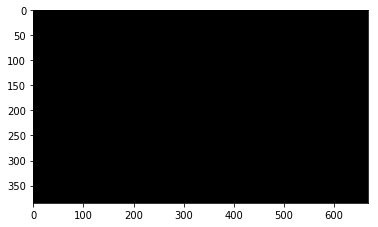

In [146]:
Y = my_conv(bw,W)
plt.imshow(Y,cmap='gray')
plt.show()